<h1 style="font-family:Patua One;text-align:center;font-size=45px;color:#049AE1;">Machine Learning Laboratory </h1>
<h2 style="font-family:Patua One;text-align:center;font-size=45px;color:#049AE1;">(410302) </h2>
<h3 style="font-family:Bookman Old Style;text-align:center;font-size=35px;color:#03D1EE;">BE Sem I Honors in AI/ML </h3>
<h4 style="font-family:Bookman Old Style;text-align:center;font-size=30px;color:#03D1EE;">Academic Year: 2022-23 </h4>
<h2 style="font-family:Farro;text-align:center;font-size=50px;color:#02DA87;">Lab Assignment No.6  </h2>
<h4 style="font-family:Bookman Old Style;text-align:left;font-size=30px;color:#A6065B;">Name - Atharv Sunil Biradar </h4>
<h4 style="font-family:Bookman Old Style;text-align:left;font-size=30px;color:#A6065B;">Roll No. - 42213 </h4>
<h4 style="font-family:Bookman Old Style;text-align:left;font-size=30px;color:#A6065B;">PRN No. - 72016708G </h4>
<h4 style="font-family:Bookman Old Style;text-align:left;font-size=30px;color:#A6065B;">ABC ID - 899-868-934-035 </h4>
<h4 style="font-family:Bookman Old Style;text-align:left;font-size=30px;color:#A6065B;">Branch - E&TE </h4>
<h4 style="font-family:Bookman Old Style;text-align:left;font-size=30px;color:#A6065B;">College - P.I.C.T </h4>
<br>

<br><p style="font-family:Footlight MT Light;text-align:left;font-size:1.2em;font-weight:bold;color:#E35E06;"> 
Problem Statement:<br>Write a program to solve a problem using SVM in python<br><br>Objective:<br>Train SVM classifier using sklearn digits dataset<br>(i.e. from sklearn.datasets import load_digits) and then,<br>1. Measure accuracy of your model using different kernels such as rbf and linear.<br>2. Tune your model further using regularization and gamma parameters and try to come up with highest accuracy score.<br>3. Use 80% of samples as training data size.<br> </p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

In [2]:
from sklearn.datasets import load_digits

digit = load_digits()
digit

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
digit_df = pd.DataFrame(digit.data)
digit_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
digit.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

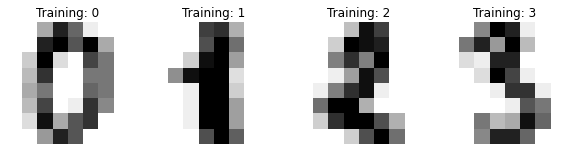

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digit.images, digit.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [6]:
n_samples = len(digit.images)
n_samples
x = digit.images.reshape((n_samples, -1))
print(x)
y= digit.target
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [7]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 4)
print("Shape of Xtrain data:", xtrain.shape)
print("Shape of Ytrain data:", ytrain.shape)
print("Shape of Xtest data:", xtest.shape)
print("Shape of Xtest data:", ytest.shape)

Shape of Xtrain data: (1437, 64)
Shape of Ytrain data: (1437,)
Shape of Xtest data: (360, 64)
Shape of Xtest data: (360,)


In [8]:
from sklearn.svm import SVC

model = SVC(kernel = "rbf")
print("The model:\n", model)

The model:
 SVC()


In [9]:
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print("Prediction given by model\n", ypred)

Prediction given by model
 [6 7 0 5 3 5 1 3 1 8 2 7 8 4 7 7 8 3 0 6 9 7 1 0 8 6 8 1 0 0 0 2 7 1 1 7 6
 3 1 3 4 2 9 5 2 0 0 7 3 3 2 9 7 6 1 8 5 8 6 7 5 6 9 3 1 4 1 9 7 8 4 4 2 4
 1 6 6 7 8 1 2 6 9 1 7 4 2 6 7 3 7 5 4 8 5 1 5 6 7 1 2 5 5 2 0 8 5 2 2 3 0
 4 5 6 9 3 9 5 7 4 7 8 9 4 9 7 9 7 9 4 3 0 5 4 9 2 3 2 9 6 2 6 0 5 5 8 9 2
 4 3 4 4 2 0 9 8 4 3 6 6 2 9 7 1 5 7 6 0 5 3 2 3 1 3 2 6 6 0 8 2 5 7 6 8 4
 6 2 2 0 4 0 3 0 4 0 1 5 6 4 7 1 5 4 5 5 3 4 4 6 3 7 1 1 3 5 7 5 0 1 9 5 0
 8 7 4 0 6 6 5 0 2 4 2 9 4 0 6 2 9 1 9 6 3 9 0 8 3 1 2 1 3 2 0 9 0 7 5 9 1
 8 6 9 6 8 8 6 2 4 5 9 9 1 5 2 8 4 7 9 8 8 0 1 7 3 2 2 1 0 3 2 3 9 7 2 0 0
 1 2 6 0 9 9 7 8 5 4 0 0 1 5 7 1 0 3 9 8 5 4 7 0 4 9 5 6 0 8 2 0 5 2 3 2 2
 4 2 8 7 5 8 8 6 9 2 6 4 5 9 5 4 1 7 1 7 3 4 8 5 4 3 7]


In [10]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(ytest, ypred)
print("Confusion Matrix is:\n", matrix)

Confusion Matrix is:
 [[38  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  2  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  0 35]]


In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(ytest, ypred)
print("Accuracy of model: {}%".format(accuracy*100))

Accuracy of model: 99.16666666666667%


In [12]:
# Linear kernel 

model_linear_kernel = SVC(kernel = "linear")
model_linear_kernel.fit(xtrain, ytrain)
print("Accuracy of model for linear kernel: {}%".format(model_linear_kernel.score(xtest, ytest)*100))

Accuracy of model for linear kernel: 98.05555555555556%


In [13]:
# Experimenting with regularization and gamma parameters

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(kernel="linear",C=C, gamma=gamma)
        clf.fit(xtrain,ytrain)
        ypred = clf.predict(xtest)
        accuracy = accuracy_score(ytest, ypred)
        print("----------------------------------------------------------------")
        print("Regularization parameter lambda = " , C)
        print("Gamma parameter = " , gamma)
        print("Test accuracy= " , str(accuracy*100))

----------------------------------------------------------------
Regularization parameter lambda =  0.01
Gamma parameter =  0.1
Test accuracy=  97.77777777777777
----------------------------------------------------------------
Regularization parameter lambda =  0.01
Gamma parameter =  1
Test accuracy=  97.77777777777777
----------------------------------------------------------------
Regularization parameter lambda =  0.01
Gamma parameter =  10.0
Test accuracy=  97.77777777777777
----------------------------------------------------------------
Regularization parameter lambda =  1
Gamma parameter =  0.1
Test accuracy=  98.05555555555556
----------------------------------------------------------------
Regularization parameter lambda =  1
Gamma parameter =  1
Test accuracy=  98.05555555555556
----------------------------------------------------------------
Regularization parameter lambda =  1
Gamma parameter =  10.0
Test accuracy=  98.05555555555556
---------------------------------------

<br><p style="font-family:Footlight MT Light;text-align:left;font-size:1.2em;font-weight:bold;color:#8E06E3;">Conclusion<br>Accuracy Result of " rbf kernel SVC ": 99.16%<br>Accuracy Result of " linear kernel SVC ": 98.055%
<br>Hyperparameter tuning accuracy of linear kernel SVC: 98.055%</p>


